# Podstawowe predykaty geometryczne, przeprowadzanie testów, wizualizacja i opracowanie wyników

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test1 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [3]:
def draw_points(points):
    vis = Visualizer()
    vis.add_point(points, s=30, color='green')
    vis.show()

In [70]:
def draw_line(points_left, points_mid, points_right):
    vis = Visualizer()
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='red')
    vis.add_point(points_left, s=30, color=['green'])
    
    vis.add_point(points_right, s=30, color=['orange'])
    vis.add_point(points_mid, s=30, color=['purple'])
    vis.show()

In [5]:
def draw_example():
    vis = Visualizer()
    vis.add_line(((0, 2), (10, 7)))
    vis.add_point((4, 4), s=30, color='green')
    vis.add_point((6, 6), s=30, color='red')
    vis.add_point((7, 4), s=30, color='purple')
    vis.show()

### Wprowadzenie
Celem ćwiczenia jest określenie po której stronie prostej znajduje się punkt.

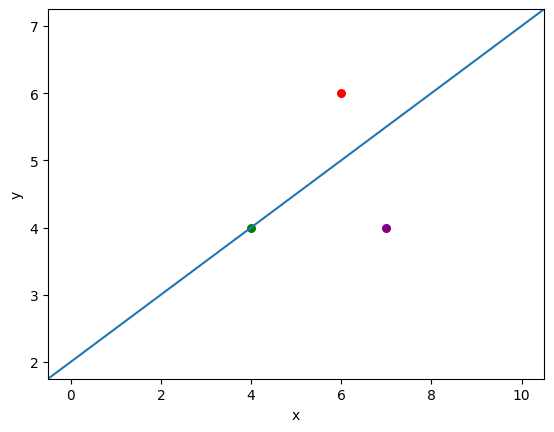

In [6]:
draw_example()

Do tego celu potrzebujesz wygenerować zbiory punktów testowych.


# Generowanie losowych punktów na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_points```
 (Aby generować losowo liczby rzeczywiste bardzo przydatna może okazać się jakaś funckja biblioteczna)

In [7]:

def generate_uniform_points(left, right, n ):
    points=[[0,0]for i in range (n)]
    for i in range(n):
        points[i][0]=random.uniform(left,right)
        points[i][1]=random.uniform(left,right)
    return points



<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x, y \in \left[-1000,1000\right]^{2}$.

In [65]:
points_a = generate_uniform_points(-1000, 1000, 10 ** 5)

Zwizualizuj wygenerowane punkty

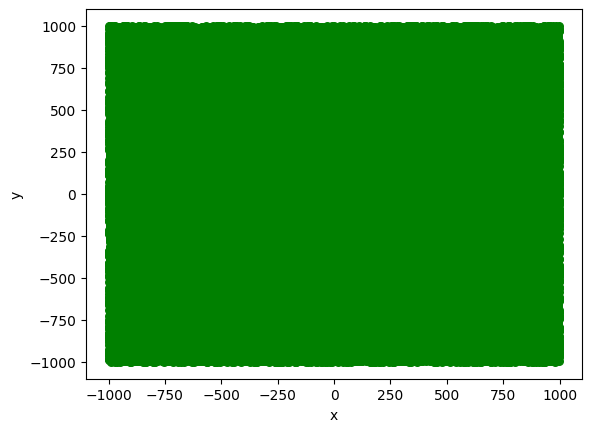

In [9]:
draw_points(points_a)

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $ x, y \in \left[-10^{14},10^{14}\right]^{2}$. Uzupełnij funkcję ```generate_big_num_of_points_2D```. Sprawdź, czy różni się wizualizalnie wynik tego ćwiczenia z poprzednim.

In [125]:
points_b = generate_uniform_points(-10 ** 14, 10 ** 14, 10 ** 5)

Zwizualizuj wygenerowane punkty.

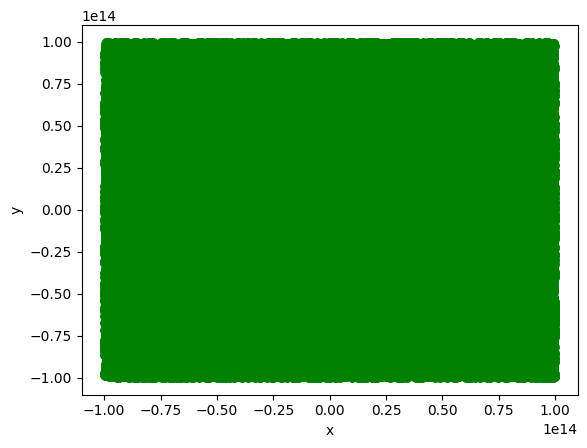

In [57]:
draw_points(points_b)

Uzupełnij funkcję ```generate_circle_points```

Zastanów się w sposób generować punkty jednostajnie na okręgu.

In [12]:
def generate_circle_points(O, R, n ):
    points=[[None,None]for i in range(n)]
    for i in range(n):
        points[i][0]=random.uniform(-R,R)
        points[i][1]=random.uniform(-(R**2-points[i][0]**2)**0.5,(R**2-points[i][0]**2)**0.5)
        points[i][0]+=O[0]
        points[i][1]+=O[1]
    return points

<span style="color:red">Ćw.</span> Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. 

Uzupełnij funkcję ```generate_points_on_circle_2D```.

In [135]:
points_c = generate_circle_points((0, 0), 100,100000)

Zwizualizuj wygenerowane punkty.

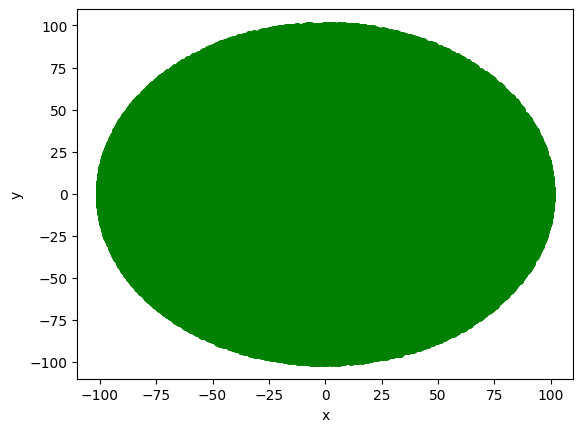

In [14]:
draw_points(points_c)

Uzupełnij funkcję ```generate_collinear_points```.

In [15]:
def generate_collinear_points(l,r,a, b, n):
    ##y=mx+c
    m=(a[1]-b[1])/(a[0]-b[0])
    c=a[1]-m*a[0]
    points=[[None,None]for i in range(n)]
    for i in range(n):
        points[i][0]=random.uniform(l,r)
        points[i][1]=points[i][0]*m+c
    return points
    

<span style="color:red">Ćw.</span>  Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D o współrzędnej z przedziału $ x \in \langle -1000,1000 \rangle$ leżących na prostej wyznaczonej przez wektor $ \overrightarrow{ab}$. Przyjmij punkty $ a = (-1.0, 0.0)$ oraz $ b = (1.0, 0.1)$. Uzupełnij funkcję ```generate_points_on_line_2D```.

In [153]:
points_d= generate_collinear_points(-1000,1000,(-1.0, 0.0), (1.0,0.1),200)

Zwizualizuj wygenerowane punkty.

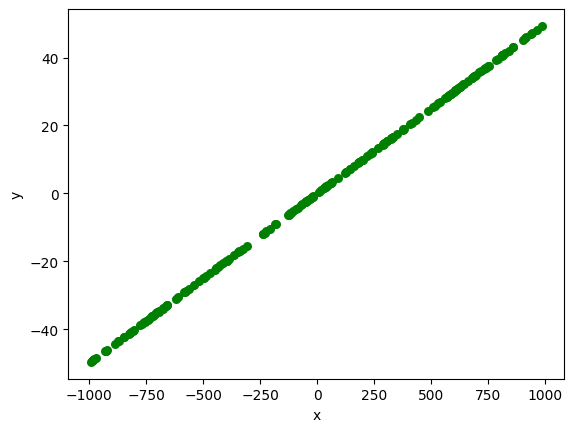

In [154]:
draw_points(points_d)

Przeprowadź test poprawności powyższych funkcji

In [19]:
Test().runtest(1, generate_uniform_points, generate_circle_points, generate_collinear_points)

Lab 1, task 1:
	Test 1: 

TypeError: generate_uniform_points() missing 1 required positional argument: 'n'

# Po której stornie prostej znajduje się punkt?

Prostym sposobem do obliczenia, po której strnie prostej znajduje się punkt jest obliczenie iloczynu wektorowego 
$\overrightarrow{ab} \times \overrightarrow{ac}$, gdzie $ c = (x,y)$ jest punktem, dla którego poszukujemy wiadomości o lokalizacji względem prostej przechodzącej przez punkty $ a$ i $ b$. Metoda ta jest równoznaczna z obliczeniem wyznacznika macierzy $ 2\times2$:  

$$
(1)\det(a, b, c)= \begin{vmatrix}
       a_{x} - c_{x} & a_{y} - c_{y} \\
       b_{x} - c_{x} & b_{y} - c_{y} 
              \end{vmatrix}
$$


lub wyznacznika macierzy $ 3\times3$:

$$
(2)\det(a, b, c)= \begin{vmatrix}
       a_{x} & a_{y} & 1 \\
       b_{x} & b_{y} & 1 \\
       c_{x} & c_{y} & 1
              \end{vmatrix}
$$

Upraszczając tą macierz przez odjęcie drugiego wiersza od trzeciego i odjęcie pierwszego wiersza od drugiego otrzymamy:

$$
\det(a, b, c)  = \begin{vmatrix}
              a_{x}         & a_{y}         & 1 \\
              b_{x} - a_{x} & b_{y} - a_{y} & 0 \\
              c_{x} - b_{x} & c_{y} - b_{y} & 0
                     \end{vmatrix}
              = (b_{x} - a_{x})(c_{y} - b_{y}) - (b_{y} - a_{y})(c_{x} - b_{x})
$$

Jest to wzór, z który opisuje pole równoległoboku mającego boki $ ab$ oraz $ ac$ (Dowód dlaczego tak jest, do zrobienia w domu)  
Dlaczego wiemy, że po obliczeniu wskaźnika podanego powyżej będziemy wiedzieć, po której stornie prostej znajduje się punkt?</font>
<font size="1">
</br>
***

**Dowód**:  

Załóżmy, że mamy dane trzy punkty w przestrzeni 2-wymiarowej $A, B$ oraz $C$. Znajdujemy prostą przechodzącą przez punkty $A$ i $B$. Następnie obliczamy $C_{y}$ przy danym $C_{x}$ i sprawdzamy czy punkt leży nad czy pod prostą.
Współczynnik nachylenia prostej jest nastepujący:

$$a = \frac{B_{y} - A_{y}}{B_{x} - A_{x}}
$$
Natomiast współczynnik $b$ wynosi:

$$b = B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}
$$

Po wpisaniu do równania $y = ax + b$ wyliczonego nachylenia prostej, współczynnika $b$ oraz zmiennej $C_{x}$ otrzymujemy:

$$y = \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x}+ \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right)
$$

Otzymujemy punkt $C$ po lewej stronie prostej jeżeli $C_{y} - y > 0$, po prawej jeżeli $C_{y} - y < 0$, a punkt $C$ leżący na prostej, jeżeli $C_{y} - y = 0$. Przekształcimy powyższe równanie dla $C_{y} - y > 0$:

$$C_{y} - y > 0$$ 
$$C_{y} - \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x} - \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right) > 0$$
$$C_{y}(B_{x} - A_{x}) - C_{x}(B_{y} - A_{y}) - B_{y}(B_{x} - A_{x}) + B_{x}(B_{y} - A_{y}) > 0$$
$$(C_{y} - B_{y})(B_{x} - A_{x}) + (B_{x} - C_{x})(B_{y} - A_{y}) > 0$$ 
$$(C_{y} - B_{y})(B_{x} - A_{x}) - (C_{x} - B_{x})(B_{y} - A_{y}) > 0$$

Zatem widzimy, że ostatnie równie jest takie same co przy równaniu wyznacznika macierzy $3\times3$. Niejawnie założyliśmy tutaj, że $B_{x}$ jest wieksze od $A_{x}$ , jeżeli byłoby odwrotnie zmieniłby się tylko znak nierówności na przeciwny. W naszym przypadku pokazaliśmy, że $C$ znajduje się po lewej stronie prostej jeżeli wyznacznik jest dodatni oraz po prawej stronie prostej, jeżeli wyznacznik jest ujemny. $Q.E.D$

---
Kolejnym zadaniem będzie zaimplementowanie własnych wyznaczników $(1)$ oraz $(2)$ i porówanie ich szybkości działania z wyznacznikami bibliotecznymi w testowaniu dla różnych zbiorów punktów. Co dodatkowo chcemy sprawdzić, czy wszystkie wyznaczniki podobnie kwalifikują podział względem danej lini.

Uzupełnij funkcje ```mat_det_3x3```

In [20]:
def mat_det_3x3(a, b, c):
    
    return a[0]*b[1]+a[1]*c[0]+b[0]*c[1]-b[1]*c[0]-a[1]*b[0]-a[0]*c[1]

Uzupełnij funkcję ```mat_det_3x3_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [21]:
def mat_det_3x3_lib(a, b, c):
    matrix=[[a[0],a[1],1],[b[0],b[1],1],[c[0],c[1],1]]
    
    return np.linalg.det(matrix)

Uzupełnij funkcje ```mat_det_2x2```

In [22]:
def mat_det_2x2(a, b, c):
    return (a[0]-c[0])*(b[1]-c[1])-(b[0]-c[0])*(a[1]-c[1])

Uzupełnij funkcję ```mat_det_2x2_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [23]:
def mat_det_2x2_lib(a, b, c):
    matrix=[[(a[0]-c[0]),(a[1]-c[1])],[(b[0]-c[0]),(b[1]-c[1])]]
    return np.linalg.det(matrix)

Przetestujmy napisane powyżej funkcje.

In [24]:
Test().runtest(2, mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib)

Lab 1, task 2:
	Test 1: Passed
	Test 2: Passed
Result: 2/2
Time: 0.000s


<span style="color:red">Ćw.</span> Klasyfikacja punktów względem prostej - zaimplementuj funkcję ```categorize_points```, która skwalifukuje punkty względem prostej wyznacznonej przez wektor $\large \overrightarrow{ab}$ (prosta przechodząca przez punkty $\large a$ oraz $\large b$.

In [58]:
def categorize_points(points, a, b, mat_det_func, eps):
    l=[]
    m=[]
    p=[]
    for i in range(len(points)):
        if mat_det_func(a,b,points[i])>eps:
            l.append(points[i])
        elif mat_det_func(a,b,points[i])<-eps:
            p.append(points[i])
        else:
             m.append(points[i])
    print(len(l),len(m),len(p))
    return l,m,p

In [26]:
a = (-1.0, 0.0)
b = (1.0, 0.1)

Zwizualizuj sklasyfikowane punkty. Punkty różnią się kolorami ze względu na klasyfikację: na lewo od prostej - zielone, na prostej - fioletowe, na prawo - pomarańczowe.

In [177]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(np.float32(points_a), a, b, mat_det_3x3_lib, 10**0)

50088 57 49855


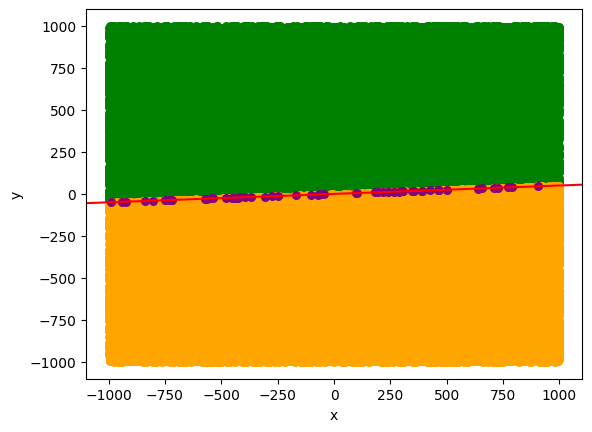

In [120]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [178]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10**(10))

49737 5 50258


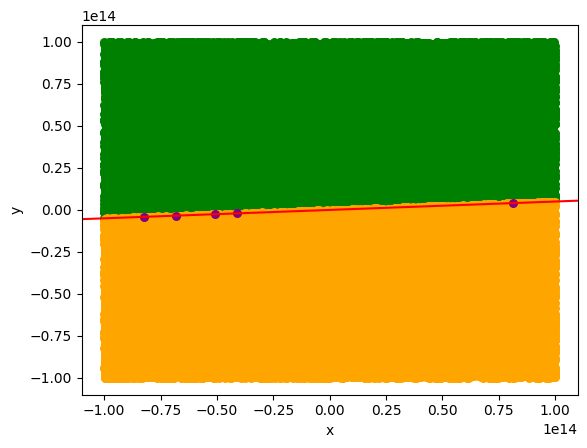

In [128]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [179]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(np.float32(points_c), a, b, mat_det_2x2_lib, 10**(0))

49606 760 49634


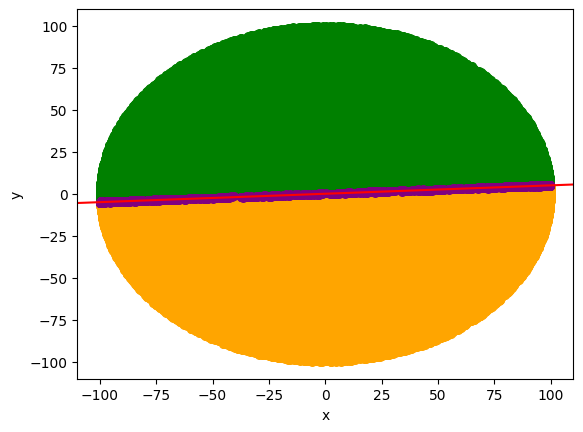

In [144]:

draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [198]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 0)

24 145 31


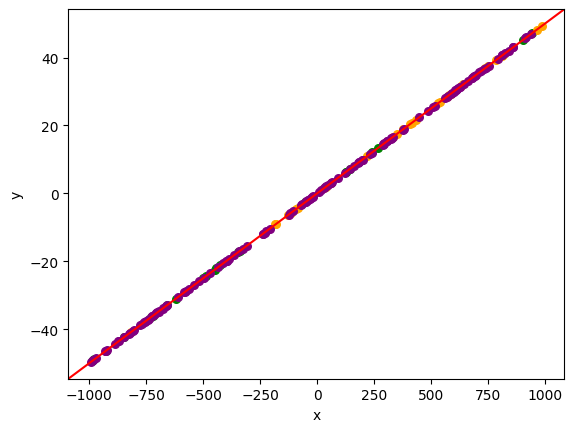

In [199]:

draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

Przeprowadźmy teraz testy dla mniejszej precyzji obliczeń. Do tego celu należy zmiejszyć typ danych z float64 (domyślny typ floata w pythonie) na float32. Różnią się one tym, że float32 jest zapisywane na mniejszej ilości bitów, co przekłada się no mniejszą ilosć cyfr po przecinku.
Zamienić typ floata w całej tablicy można zrobić w następujący sposób:

In [ ]:
points_a_float32 = np.float32(points_a)

Porównaj wyniki klasyfikacji dla współrzędnych punktów o zmiejszonej precyzji floata

## Opisz swoje wnioski na podstawie przeprowadzonych własnoręcznie testów.
